# Lab Assignment

**Dependies**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error

**File Reading**

In [ ]:
df = pd.read_csv('Fuel_cell_performance_data-Full.csv')
print("Dataset Head:")
print(df.head())
print("\nDataset Info:")
print(df.info())
print("\nMissing Values:")
print(df.isnull().sum())

Dataset Head:
     F1    F2    F3     F4      F5    F6     F7     F8   F9   F10      F11  \
0  52.9  1.33  49.1  37.13  129.43  35.0  0.281  112.7  207  0.55   98.971   
1  87.6  2.12  48.8  42.10  171.07  37.6  0.153  157.4  188  0.86  101.179   
2  73.3  2.72  93.8  20.11  163.69  44.3  0.367  348.7  270  1.87   98.919   
3  65.6  2.58  48.1  35.11   63.37  32.5  0.279  321.2  322  1.75  101.560   
4  39.6  2.58  49.3  32.93   63.40  47.0  0.149  205.6  203  1.55   98.148   

    F12   F13   F14   F15  Target1  Target2  Target3  Target4  Target5  
0  2.87  1362  15.9   429    0.959    1.531     79.3     4.19    33.29  
1  2.34  5130  26.1  1819    0.728    1.690     57.2     5.19    34.50  
2  2.13  7811  16.7  1763    0.784    1.865     61.6     7.77   129.28  
3  2.91  1641  32.1   203    0.884    1.920     71.3     8.40   186.65  
4  1.93  7648  27.5   276    0.736    1.711     58.5     4.75    52.32  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 

**Select Features**

In [55]:
X = df[['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10',
        'F11', 'F12', 'F13', 'F14', 'F15']]
y = df['Target1']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(X)
print(y)

print(f"Training Set Size: {X_train.shape}")
print(f"Testing Set Size: {X_test.shape}")

       F1    F2    F3     F4      F5    F6     F7     F8   F9   F10      F11  \
0    52.9  1.33  49.1  37.13  129.43  35.0  0.281  112.7  207  0.55   98.971   
1    87.6  2.12  48.8  42.10  171.07  37.6  0.153  157.4  188  0.86  101.179   
2    73.3  2.72  93.8  20.11  163.69  44.3  0.367  348.7  270  1.87   98.919   
3    65.6  2.58  48.1  35.11   63.37  32.5  0.279  321.2  322  1.75  101.560   
4    39.6  2.58  49.3  32.93   63.40  47.0  0.149  205.6  203  1.55   98.148   
..    ...   ...   ...    ...     ...   ...    ...    ...  ...   ...      ...   
995  35.7  2.35  90.8  27.08  187.90  42.7  0.274  185.1  299  1.47  102.654   
996  83.2  2.92  41.0  24.22   60.14  38.2  0.300  157.5   97  1.17   99.714   
997  37.3  1.16  51.9  25.37   92.78  43.3  0.385  237.6  166  0.72  100.844   
998  87.8  1.15  50.8  30.04  168.43  35.8  0.205  382.3  276  1.22  100.460   
999  55.5  1.51  88.4  16.22  136.05  28.5  0.287  136.8   82  0.55  103.686   

      F12   F13   F14   F15  
0    2.87

**Target 1 graph**

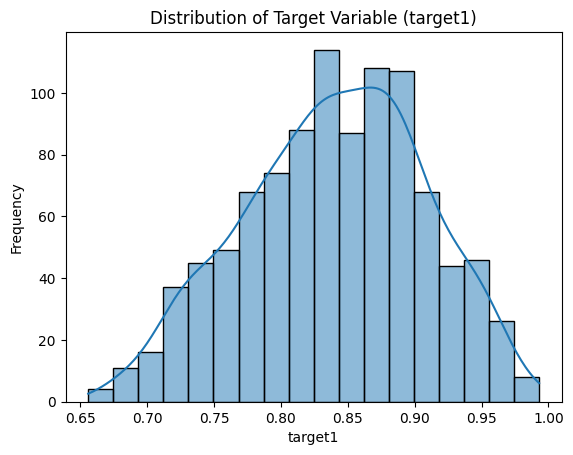

In [ ]:
sns.histplot(df['Target1'], kde=True)
plt.title("Distribution of Target Variable (target1)")
plt.xlabel("target1")
plt.ylabel("Frequency")
plt.show()

**Regression**

In [76]:
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'SVR': SVR()
}

regression_results = {}
regression_predictions = {}

for name, model in models.items():
    # Train model
    model.fit(X_train_scaled, y_train)

    # Make predictions
    predictions = model.predict(X_test_scaled)
    regression_predictions[name] = predictions

    # Calculate metrics
    regression_results[name] = {
        'MSE': mean_squared_error(y_test, predictions),
        'RMSE': np.sqrt(mean_squared_error(y_test, predictions)),
        'MAE': mean_absolute_error(y_test, predictions),
        'MAPE': mean_absolute_percentage_error(y_test, predictions) * 100,
        'R2': r2_score(y_test, predictions)
    }

**Regression model evaluation**

In [80]:
def evaluate_model_performance(regression_results, regression_predictions, y_test):
    detailed_results = {}
    for name, pred in regression_predictions.items():
        detailed_results[name] = {
            'MSE': mean_squared_error(y_test, pred),
            'RMSE': np.sqrt(mean_squared_error(y_test, pred)),
            'MAE': mean_absolute_error(y_test, pred),
            'MAPE': mean_absolute_percentage_error(y_test, pred) * 100,
            'R2': r2_score(y_test, pred)
        }
    results_df = pd.DataFrame.from_dict(detailed_results, orient='index')
    results_df = results_df.round(4)
    results_df['Model'] = results_df.index
    results_df = results_df[['Model', 'MSE', 'RMSE', 'MAE', 'MAPE', 'R2']]
    results_df = results_df.sort_values('R2', ascending=False)
    results_df.to_csv('model_performance_metrics.csv', index=False)
    return results_df

performance_df = evaluate_model_performance(regression_results, regression_predictions, y_test)
print("\nModel Performance Metrics:")
print(performance_df)


Model Performance Metrics:
                               Model     MSE    RMSE     MAE    MAPE      R2
Linear Regression  Linear Regression  0.0034  0.0582  0.0486  5.9005  0.2511
Ridge Regression    Ridge Regression  0.0034  0.0582  0.0486  5.9008  0.2511
SVR                              SVR  0.0036  0.0600  0.0500  6.0500  0.2050
Random Forest          Random Forest  0.0036  0.0602  0.0504  6.1104  0.2005
Lasso Regression    Lasso Regression  0.0045  0.0674  0.0543  6.6047 -0.0016
Decision Tree          Decision Tree  0.0078  0.0880  0.0731  8.8452 -0.7113


**Regression Plots**

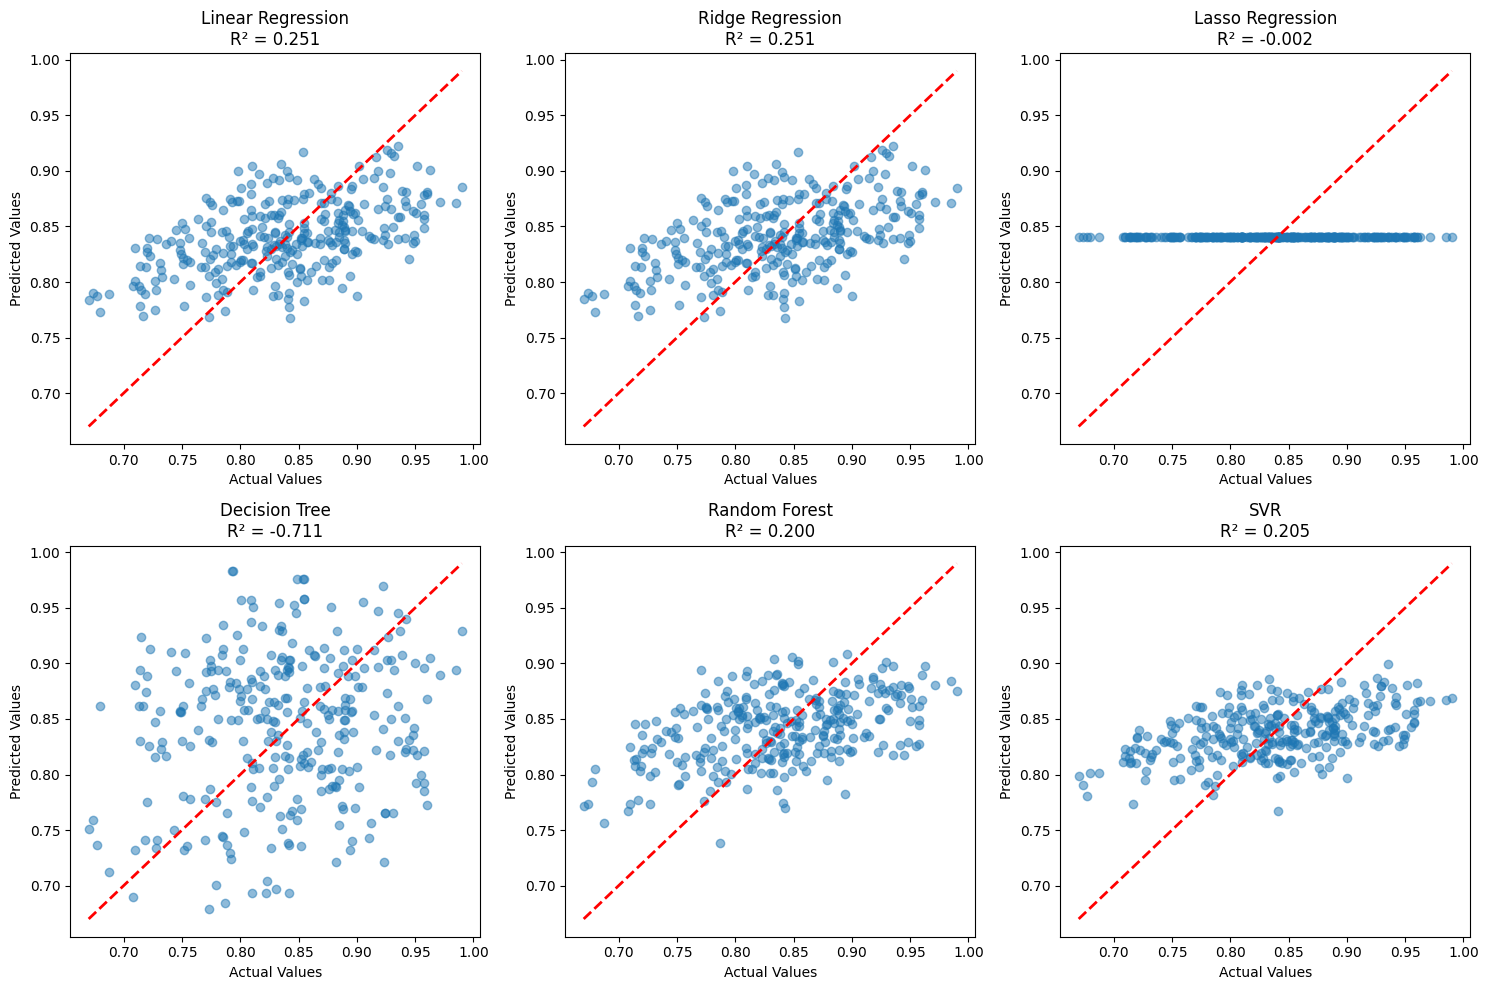

In [81]:
def plot_regression_predictions(y_test, regression_predictions, regression_results):
    n_models = len(regression_predictions)
    n_cols = 3
    n_rows = (n_models + n_cols - 1) // n_cols
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
    axes = np.array(axes).reshape(-1)

    for i, (name, pred) in enumerate(regression_predictions.items()):
        ax = axes[i]
        ax.scatter(y_test, pred, alpha=0.5)
        ax.plot([y_test.min(), y_test.max()],
                [y_test.min(), y_test.max()],
                'r--', lw=2)
        ax.set_xlabel('Actual Values')
        ax.set_ylabel('Predicted Values')
        ax.set_title(f'{name}\nR² = {regression_results[name]["R2"]:.3f}')

    for j in range(i + 1, len(axes)):
        axes[j].set_visible(False)
    plt.tight_layout()
    plt.show()

def plot_feature_importance(model_name, model, X):
    if hasattr(model, 'feature_importances_'):
        importance = model.feature_importances_
        features = X.columns
        plt.figure(figsize=(10, 6))
        sns.barplot(x=importance, y=features)
        plt.title(f'Feature Importance - {model_name}')
        plt.xlabel('Importance')
        plt.tight_layout()
        plt.show()
    else:
        print(f"Model {model_name} does not have feature importances attribute")

plot_regression_predictions(y_test, regression_predictions, regression_results)

# Outputs and results


Best Prediction Model: Linear Regression
R² Score: 0.2511


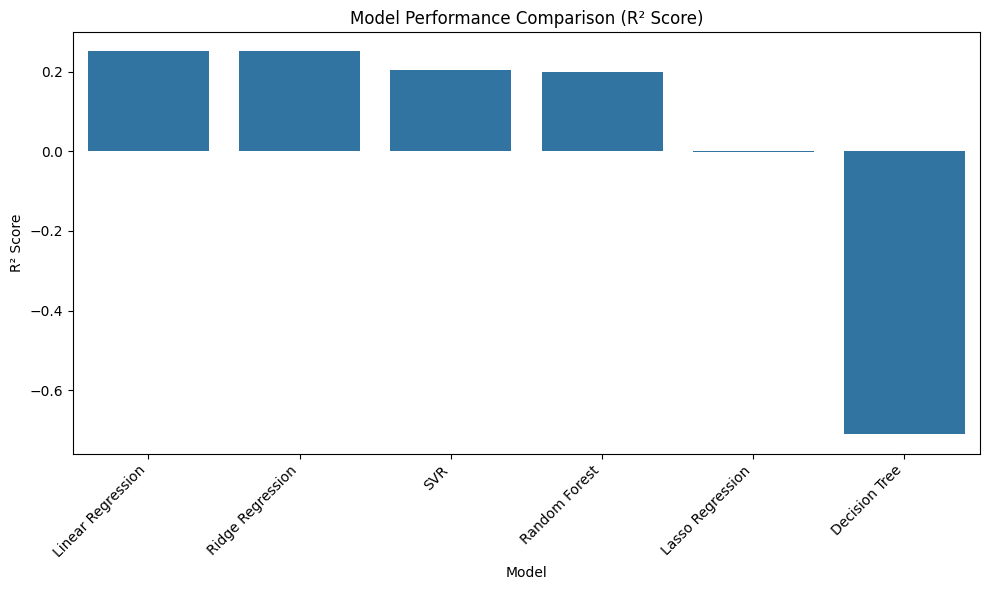

In [83]:
best_model = performance_df.iloc[0]
print(f"\nBest Prediction Model: {best_model['Model']}")
print(f"R² Score: {best_model['R2']:.4f}")

plt.figure(figsize=(10, 6))
sns.barplot(data=performance_df, x='Model', y='R2')
plt.title("Model Performance Comparison (R² Score)")
plt.ylabel("R² Score")
plt.xlabel("Model")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Conclusion**

We tested several regression models to predict Target1 using 15 features, and the results were quite insightful. The Linear Regresssion model stood out with its ability and delivered the most accurate predictions, closely followed by SVR. Ridge regression performed well for simpler linear patterns, while feature importance analysis revealed the key contributors driving predictions. Visualizations showed a strong match between actual and predicted values for the top models. Going forward, fine-tuning the models and exploring advanced options like XGBoost could further enhance accuracy. Based on the results, Linear Regression is the best choice for deployment.